# Linear Regression: Step-by-Step

This notebook will guide you to make a simple univariate linear regression, meaning: there is only 1 independent variable as the input, and 1 dependent variable as the output. No other Machine Learning (ML) framework is used here to learn about the basic process of linear regression.

In the simplest form, linear regression model can be defined as:

$$y=mx+c$$

where $m$ indicates the gradient/slope of the line, and $c$ indicates the height offset of the line. However, to minimize the confusion with Neural Network (NN) later, let's use the similar term used in NN:

$$y=wx+b$$

where $w$ indicates $weight$ (coresponds to slope, $m$/), and $b$ indicates $bias$ (corresponds to height offset, $c$)

Linear regression is one of the supervised Machine Learning algorithm, which means, given input data & target data, the algorithm will ~~magically~~ statistically model the mapping between input data & target data, without needing the user to define the model by themselves

In [10]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
plt.close('all')

## 0 - Vectorization Introduction

This notebook will use Vectorization, meaning that we will use matrix multiplication as much as possible to replace iteration method. 

We will generate input data and target data as 2D data. This means that the data will have row and column, and each sample is added as a new column (added horizontally)

$$
x = \begin{bmatrix} 
\begin{bmatrix} 
x_{0} & x_{1} & ... & x_{N-1}
\end{bmatrix}
\end{bmatrix}
$$

In [11]:
# Generate univariate training dataset
TARGET_W = -1
TARGET_B = 2
SAMPLE_NM = 100
x = np.random.random(size=(1, SAMPLE_NM)) * 10
noise = (np.random.random(size=(1, SAMPLE_NM)) - 0.5) * 3
y = (TARGET_W * x + TARGET_B) + noise
print("Input data shape: {}".format(x.shape))
print("Target data shape: {}".format(x.shape))

Input data shape: (1, 100)
Target data shape: (1, 100)


Text(0, 0.5, 'Output')

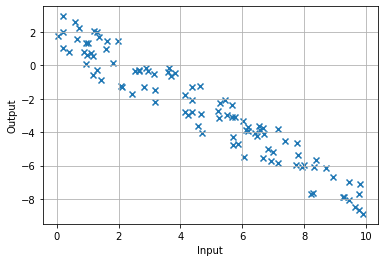

In [12]:
# Draw training dataset
plt.figure()
plt.grid()
plt.scatter(x, y, marker='x')
plt.xlabel('Input')
plt.ylabel('Output')

Given those data points (input, target) in the figure above, we will use Linear Regression method to define the model. Let's start of

## 1 - Weight Initialization

Actually, we have two variables to optimize: $weight$ and $bias$, so this initialization is basically done for all variable that needs optimization, not only the $weight$. For linear regression, initializing $w$ and $b$ by zero may be fine, however it may not be a good practice for Neural Network, for some reasons that I may explain later.

For this notebook, let's start with random initialization for both $w$ and $b$. By running the next command, both $w$ and $b$ will be initialized with random value: $-0.5$ $\leq$ $(w, b)$ $\leq$ $0.5$

Since this is a univariate linear regression, there is only 1 input variable, so there is only 1 weight and 1 bias. For optimization reason, $size$ needs to be defined as 2D-shape.

In [13]:
# Weight Initialization
w = np.random.random(size=(1, 1)) - 0.5
b = np.random.random(size=(1, 1)) - 0.5
w_init = np.copy(w) # Backup purpose
b_init = np.copy(b) # Backup purpose
print("w[{}]: {}".format(w.shape, w))
print("b[{}]: {}".format(b.shape, b))

w[(1, 1)]: [[-0.18820412]]
b[(1, 1)]: [[0.19634349]]


## 2 - Cost Function

Cost function defines how bad our variable-to-optimize in predicting the label data. Basically, it calculates how big the difference is, between $target$ and the $output$ of our model, given the current value of $w$ and $b$. There are many different cost functions for different use case, that we will learn later as this progresses, but for now, we will use Mean Squared Error (MSE) as the cost function:

$$J = \frac{1}{N} \sum_{i = 0}^{N-1} (y_{i} - \hat{y_{i}})^{2}$$

and

$$\hat{y_{i}} = wx_{i} + b$$

$i$ indicates the index of the training data sample that we have, so $x_{0}$ indicates the first $input$ sample. $\hat{y_{0}}$ indicates the model $output$ when given the first $input$ sample. $y_{0}$ indicates the $label$, or truth, of the first $input$ sample. 

Basically this MSE cost function calculates the squared-difference between $target$ and $output$, and average it along all the samples we have in training set.

In [14]:
# Cost function definition
def calculate_cost(x, y, w, b):
    y_hat = np.matmul(w, x) + b
    return np.mean(np.square(y - y_hat))

## 3 - Optimization

The purpose of this optimization stage is to adjust the trainable parameter $(w, b)$ to minimize the cost value. This literally means, changing $(w, b)$ so the difference between model $output$ and $target$ value is smaller. 

To modify the trainable parameter $(w, b)$, we need to calculate how each trainable parameter will affect the cost value. This can be done by doing partial derivative of the cost function, with respect to each trainable parameter $(w, b)$. Both weight and bias will be updated following these formula:
$$\begin{align}
w &= w - \alpha\displaystyle \frac{\partial J}{\partial w} \\
\\
b &= b - \alpha\displaystyle \frac{\partial J}{\partial b}
\end{align}$$

$\alpha$ indicates learning rate, which roughly means how big we should update to the trainable parameter. Smaller number indicates slower training process, but less prone to overshoot. Higher number indicates faster training process, but has higher possibilies to overshoot, which means the cost function is actually getting bigger after weight update. Typically we can test out some learning rate such as: $\{0.1, 0.01, 0.001, ...\}$.

### 3.1 - Partial Derivatives

From the cost function:

$$J = \frac{1}{N} \sum_{i = 0}^{N-1} (y_{i} - \hat{y_{i}})^{2}$$

Since $\hat{y_{i}}$ is a function of $(w, b)$, we can rewrite the cost function as:

$$
\begin{align}
J(w, b) 
& = \frac{1}{N} \sum_{i = 0}^{N-1} (y_{i} - (wx_{i} + b))^{2} \\
& = \frac{1}{N} \sum_{i = 0}^{N-1} (y_{i} - wx_{i} - b)^{2}
\end{align}
$$

Now let's separate the inner part of the summation as separate functions:

$$P(w, b) = (y_{i} - wx_{i} - b)$$

and

$$Q(P) = P^{2}$$

so that

$$J(w, b) = \frac{1}{N} \sum_{i = 0}^{N-1} Q(P)$$

Now we can calculate partial derivative of each separate function. First for $P(w, b) = (y_{i} - wx_{i} - b)$

$$\displaystyle \frac{\partial P}{\partial w} = -x_{i}$$

$$\displaystyle \frac{\partial P}{\partial b} = -1$$

and for $Q(P) = P^{2}$

\begin{align}
\displaystyle \frac{\partial Q}{\partial P} &= 2P \\
&= 2(y_{i} - wx_{i} - b) \\
\end{align}

Now we can start calculating both $\displaystyle \frac{\partial J}{\partial w}$ and $\displaystyle \frac{\partial J}{\partial b}$, by using Chain Rule:


$$
\begin{align}
\displaystyle \frac{\partial J}{\partial w} &= \displaystyle \frac{\partial J}{\partial Q} \displaystyle \frac{\partial Q}{\partial P} \displaystyle \frac{\partial P}{\partial w} \\
&= \frac{1}{N} \sum_{i = 0}^{N-1} 2(y_{i} - wx_{i} - b).-x_{i} \\
&= -\frac{2}{N} \sum_{i = 0}^{N-1} (y_{i} - wx_{i} - b).x_{i}
\end{align}
$$


$$
\begin{align}
\displaystyle \frac{\partial J}{\partial b} &= \displaystyle \frac{\partial J}{\partial Q} \displaystyle \frac{\partial Q}{\partial P} \displaystyle \frac{\partial P}{\partial b} \\
&= \frac{1}{N} \sum_{i = 0}^{N-1} 2(y_{i} - wx_{i} - b).-1 \\
&= -\frac{2}{N} \sum_{i = 0}^{N-1} (y_{i} - wx_{i} - b)
\end{align}
$$

In [15]:
# Training
cost = calculate_cost(x, y, w, b)
print("Initial cost: {:.6f}".format(cost))

EPOCH_NM = 10000
cost_history = [cost]
for epoch in range(EPOCH_NM):
    
    # Calculate derivative
    N = x.shape[1]
    w_d = -2 / N * np.matmul((y - np.matmul(w, x) - b), x.T)
    b_d = -2 / N * np.sum(y - np.matmul(w, x) - b)
    
    # Update the weight
    l_rate = 1e-3
    w = w - l_rate * w_d
    b = b - l_rate * b_d
    
    # Calculate cost and store to history
    cost = calculate_cost(x, y, w, b)
    cost_history.append(cost)
    if epoch % (EPOCH_NM//10) == 0:
        print("Epoch-{}: {:.6f}".format(epoch, cost))
    
print("Final cost: {:.6f}".format(cost_history[-1]))

Initial cost: 10.226906
Epoch-0: 9.204578
Epoch-1000: 1.083598
Epoch-2000: 0.823940
Epoch-3000: 0.733899
Epoch-4000: 0.702675
Epoch-5000: 0.691847
Epoch-6000: 0.688092
Epoch-7000: 0.686790
Epoch-8000: 0.686339
Epoch-9000: 0.686182
Final cost: 0.686128


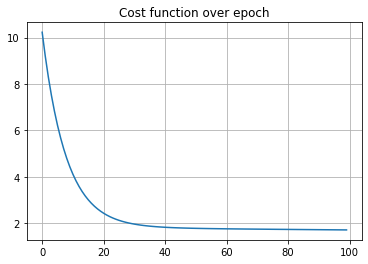

In [16]:
plt.figure()
plt.title("Cost function over epoch")
plt.grid()
plt.plot(cost_history[:EPOCH_NM//100])

Great! Now that we verify that the cost value decreases every epoch, meaning that the model is trained properly. Now let's see the final formula and the line drawn using our trained model

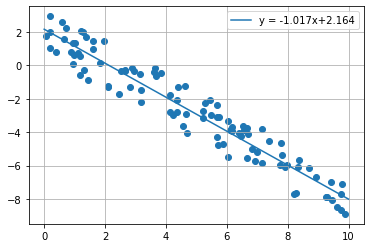

In [17]:
x_test = np.linspace(0, 10, 20).reshape(1, -1)
y_test = np.matmul(w, x_test) + b

plt.figure()
plt.grid()
plt.scatter(x, y)
plt.plot(x_test.T, y_test.T)
plt.legend(["y = {:.3f}x+{:.3f}".format(w.item(), b.item())])

In [18]:
print("Weight before training")
print("w[{}]: {}".format(w_init.shape, w_init))
print("b[{}]: {}".format(b_init.shape, b_init))
print("\nWeight after training")
print("w[{}]: {}".format(w.shape, w))
print("b[{}]: {}".format(b.shape, b))
print("\nTarget weight")
print("w: {}".format(TARGET_W))
print("b: {}".format(TARGET_B))

Weight before training
w[(1, 1)]: [[-0.18820412]]
b[(1, 1)]: [[0.19634349]]

Weight after training
w[(1, 1)]: [[-1.01743027]]
b[(1, 1)]: [[2.16392379]]

Target weight
w: -1
b: 2


Congratulation! You've finished your very first Machine Learning algorithm